## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import os
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

random_state = 4012

In [2]:
X_test = pd.read_csv('../Processed Data Files/X_test.csv')
y_test = pd.read_csv('../Processed Data Files/y_test.csv')

def evaluate(x_test,y_test,name,model,preprocessor):

    print(model,"\n")
    
    y_pred = model.predict(preprocessor.transform(x_test))

    scores = {}
    scores["Accuracy"]  = accuracy_score(y_test,y_pred).round(3)
    scores["Precision"] = precision_score(y_test,y_pred,average="weighted").round(3)
    scores["Recall"]    = recall_score(y_test,y_pred,average="weighted").round(3)
    scores["F1"]        = f1_score(y_test,y_pred,average="weighted").round(3)
    scores["ROC AUC"]   = roc_auc_score(y_test,y_pred,average="weighted").round(3)
    scores = {name:scores}
    print(pd.DataFrame(scores))

    cm = confusion_matrix(y_test,y_pred)
    cm_plot = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

### Decision Tree

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=9,
                       max_features='auto', random_state=4012) 

           decision_tree
Accuracy           0.891
F1                 0.911
Precision          0.944
ROC AUC            0.826
Recall             0.891


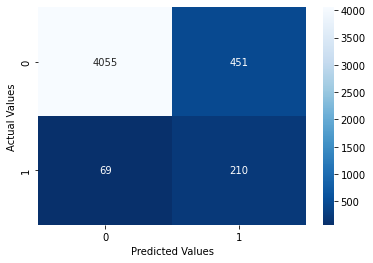

In [4]:
name = "decision_tree"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

### Random Forest

In [ ]:

name = "random_forest"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])